In [30]:
import pandas as pd
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

As you may have seen, I'm back through 2008 on the Big 3 (Governor's Ball has only been multiple days for the last 4 years, so I stopped after that). I'd like to do a graph over time of the % of unique bands for each festival. I don't know if there's a quick code way to do that, but I can also just count off the spreadsheet. I'm going to go back to 2005, when Lolla started as a destination fest.

In [64]:
years = range(2005,2017)
festivals = ['COACHELLA', 'GOVBALL', 'BONNAROO', 'LOLLA']

In [67]:
def load_df_year(year):
    """Given a year, return the cleaned df"""
    # Data clean and setup
    df = pd.read_excel('/Users/hunterowens/Downloads/Festivals.xlsx', sheetname=str(year))
    if year == 2016:
        df.drop([0,1,2], inplace=True)
        df.drop(['AVG RANK','# OF FESTS', 'PWR RANKING', 'Unnamed: 4',
                'ACL', 'EAUXCLAIRE','BUMBERSHT']
                , axis=1, inplace=True)
    df.set_index('ARTIST', inplace=True)
    df = df[festivals]
    return df

In [69]:
data = dict([(year, load_df_year(year)) for year in years])

{2005:                                            COACHELLA  BONNAROO  LOLLA
 ARTIST                                                               
 22-20s                                           NaN        64    NaN
 Aesop Rock                                        23       NaN    NaN
 Alexandra Scott                                  NaN        68    NaN
 Alison Krauss & Union Station                    NaN         7    NaN
 ALO                                              NaN        69    NaN
 Ambulance LTD                                     22       NaN     39
 Amos Lee                                         NaN        54    NaN
 Amp Fiddler                                       26       NaN    NaN
 And You Will Know Us By The Trail of Dead        NaN       NaN     31
 Arcade Fire                                       10       NaN      3
 Armin Van Buuren                                   9       NaN    NaN
 Assembly of Dust                                 NaN        53    NaN


In [20]:
def compute_percentage_of_lineup_in_other_festivals(lineup, df): 
    """Given a lineup from d[FESTIVAL_NAME], tell me what percentage is in another festival """
    sum_lineup = df[lineup].count()
    all_artists_from_other_fests = df.drop(lineup, axis=1).dropna(how='all').index.get_values()
    fest_lineup_list = df[lineup].dropna().index.get_values()
    common_artists_sum = len(set(all_artists_from_other_fests).intersection(fest_lineup_list))
    percentage = common_artists_sum / sum_lineup
    return percentage

In [79]:
chart_data = {}
for key in sorted(data):
    chart_data[key] = { festival: compute_percentage_of_lineup_in_other_festivals(festival, data[key]) for 
                       festival in data[key].columns}

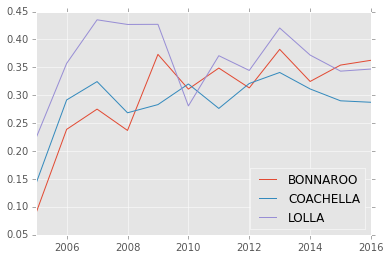

In [92]:
pd.DataFrame.from_dict(chart_data, orient='index').plot()